In [1]:
!pipenv install torch

Installing torch...
Adding torch to Pipfile's [packages]...
✔ Installation Succeeded 
Pipfile.lock (3be918) out of date, updating to (b37f01)...
Locking [dev-packages] dependencies...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! 
Updated Pipfile.lock (b37f01)!
Installing dependencies from Pipfile.lock (b37f01)...
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 0/0 — 00:00:00


In [3]:
!pipenv install torchvision

Installing torchvision...
Adding torchvision to Pipfile's [packages]...
✔ Installation Succeeded 
Pipfile.lock (b37f01) out of date, updating to (c45b02)...
Locking [dev-packages] dependencies...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! 
Updated Pipfile.lock (c45b02)!
Installing dependencies from Pipfile.lock (c45b02)...
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 0/0 — 00:00:00


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import time

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [6]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,)),
])

In [7]:
train_dataset = datasets.ImageFolder('../data/apple_data/train', transform=transform)
val_dataset = datasets.ImageFolder('../data/apple_data/test', transform=transform)

In [8]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

torch.Size([128, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


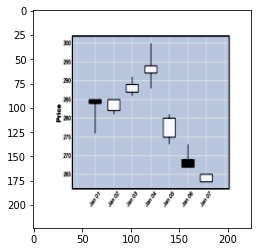

In [9]:
data_iter = iter(train_loader)
imgs, labels = data_iter.next()
print(imgs.size())
data_iter = iter(train_loader)
imgs, labels = data_iter.next()
plt.imshow(imgs[0].permute(1,2,0))

In [10]:
labels

tensor([ 0, 30, 27, 15, 12, 30, 31, 31, 17, 31,  0, 17, 12, 18, 51, 12, 47, 12,
        63, 50, 48, 30, 26, 12, 31, 54,  0, 49, 11,  1, 15, 14,  0, 48, 30, 17,
        30, 49, 32,  1, 31, 30, 51, 31, 32, 32, 50, 30, 32, 53,  0,  0, 13,  1,
        19, 30, 14,  1,  1, 12,  1, 50, 47, 32, 31, 47, 32, 30,  0,  1, 31, 47,
        48, 12, 21, 47, 47, 31, 30, 12, 22, 15, 12, 52, 48,  0, 32, 11, 20, 58,
        15, 30, 47, 49, 15, 20, 32, 31, 11, 11,  0, 53, 31, 12, 54, 30, 51,  0,
        60,  1, 30, 57,  0, 43, 57,  0, 48, 48, 30, 31, 32,  0, 32, 49,  1, 32,
        31, 50])

In [11]:
model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/miryuu/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
52.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


In [15]:
model.fc = nn.Linear(512,65)

In [16]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
%time
num_epochs = 15
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0

    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
      
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        train_loss += loss.item()
        pred = torch.argmax(outputs, dim=1)
        train_acc += (pred == labels).sum().item()

        loss.backward()
        optimizer.step()
        
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)

    model.eval()
    with torch.no_grad():
      for images, labels in val_loader:
          images = images.to(device)
          labels = labels.to(device)

          outputs = model(images)
          loss = criterion(outputs, labels)
          
          val_loss += loss.item()
          pred = torch.argmax(outputs, dim=1)
          val_acc += (pred == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    avg_val_acc = val_acc / len(val_loader.dataset)
        
    print ('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}' 
                   .format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

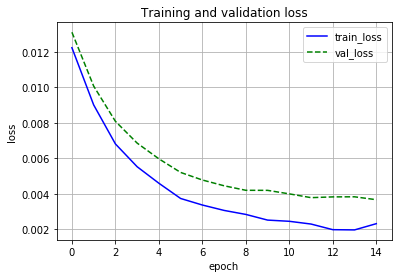

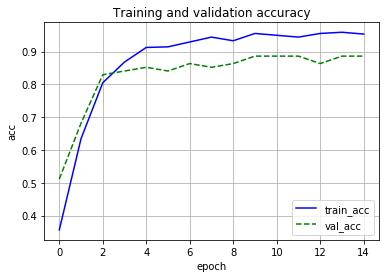

In [16]:
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()
plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation accuracy')
plt.grid()

In [17]:
from PIL import Image

<function matplotlib.pyplot.show(*args, **kw)>

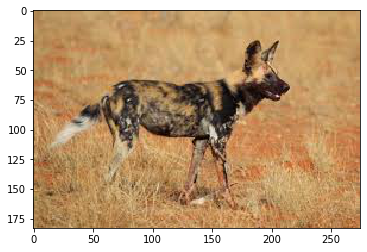

In [18]:
image_file_path = 'dog/dog.jpeg'

img = Image.open(image_file_path)
plt.imshow(img)
plt.show

In [19]:
img_transformed = transform(img)
img_transformed.size()

torch.Size([3, 224, 224])

In [20]:
inputs = img_transformed.unsqueeze_(0)
inputs.size()

torch.Size([1, 3, 224, 224])

In [21]:
outputs = model(inputs.cuda())
pred = torch.argmax(outputs,dim=1)

if pred == 0:
    print("A")
elif pred == 1:
    print("df")
elif pred == 2:
    print("d")
elif pred == 3:
    print("")

A
